In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                         columns = np.append(cancer['feature_names'], ['target']))


In [3]:
df_cancer.shape


(569, 31)

<Axes: ylabel='count'>

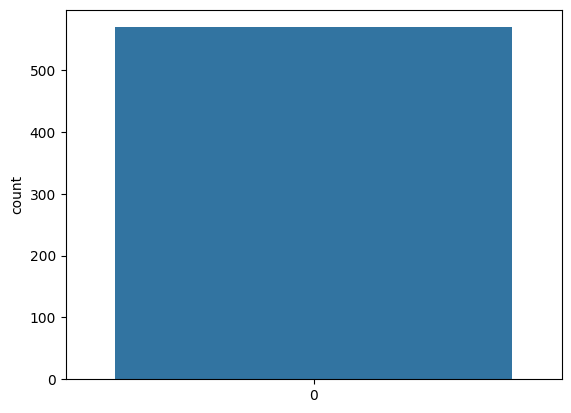

In [4]:
sns.countplot(df_cancer['target'])


<Axes: >

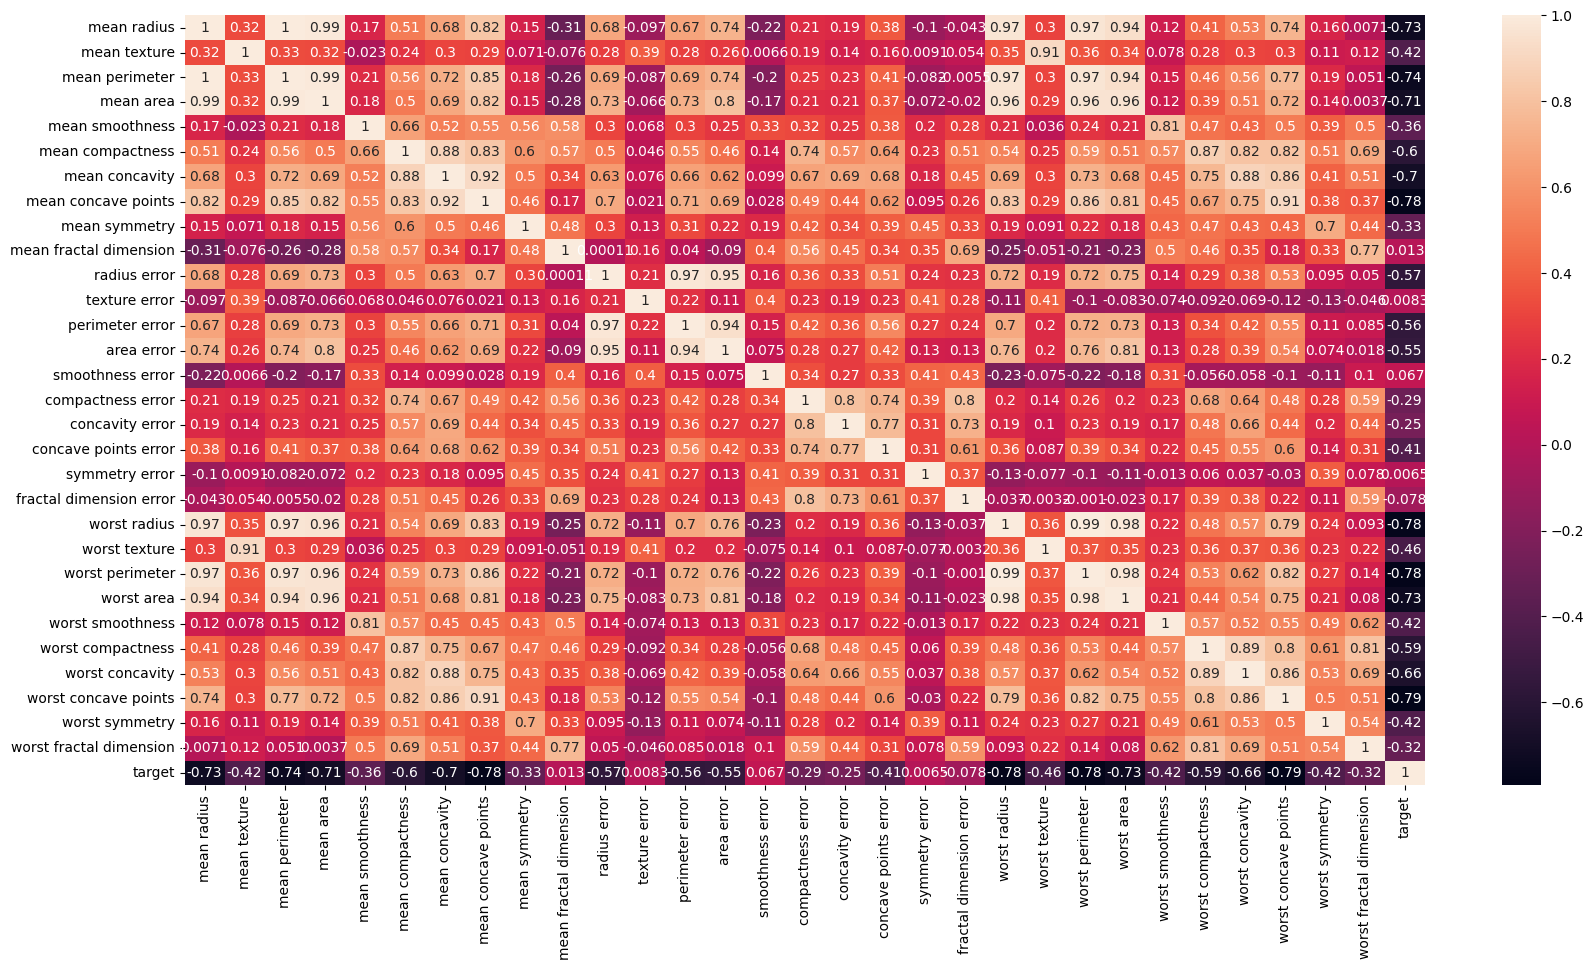

In [5]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_cancer.corr(), annot=True)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = df_cancer.drop(['target'], axis = 1)
y = df_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

<Axes: >

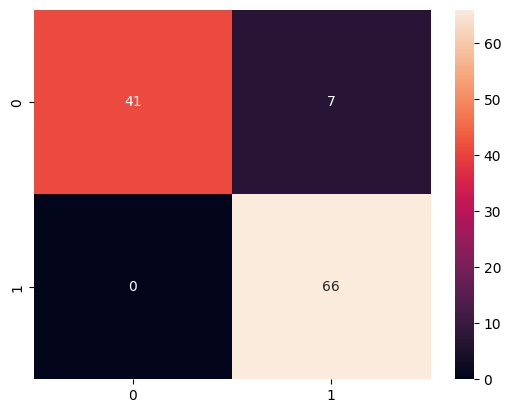

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)


In [8]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



c:\Users\Ashwath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


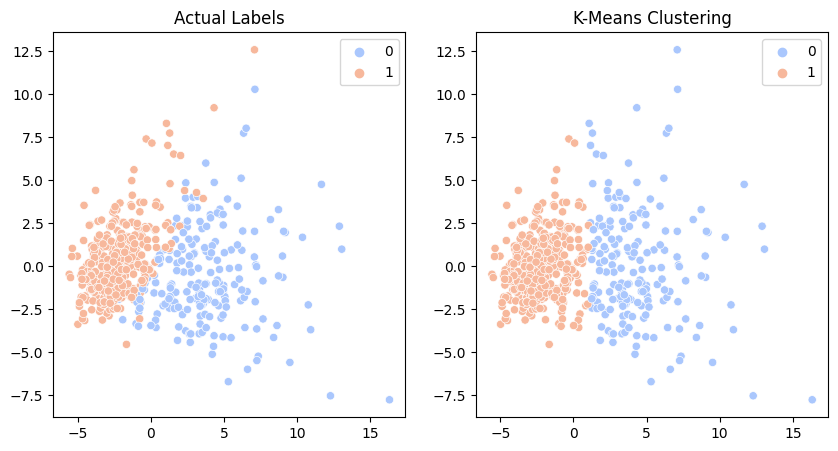

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load breast cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Filter for differentially expressed genes
diff_exp_genes = df.columns[df.mean() > df.mean().quantile(0.75)]

# Perform clustering analysis
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_data)

# Visualize results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cancer['target'], palette='coolwarm')
plt.title('Actual Labels')
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans.labels_, palette='coolwarm')
plt.title('K-Means Clustering')
plt.show()
